# Titanic

### Problem description
When the Titanic first set out, people believed the ship could not sink. However, the unthinkable happened. The titanic hit an iceberg ripping open half of its side leading to the sinking of the Titanic. Because no-one had expected this, there were insufficient life boats aboard the ship. 

From analysis it has shown that certain people on board were more likely to survive than others. This exercise will focus on developing a model which can predict survival on board of the Titanic

### Variables in the titanic
Variable  &  Definition                                                  
survival  =  Survival    - key: 0 = No, 1 = Yes
pclass	  =  Ticket class - key: 1 = 1st, 2 = 2nd, 3 = 3rd
sex	      =  Sex	
Age	      =  Age in years	
sibsp	  =  # of siblings / spouses aboard the Titanic	
parch	  =  # of parents / children aboard the Titanic	
ticket	  =  Ticket number	
fare	  =  Passenger fare	
cabin	  =  Cabin number	
embarked  =  Port of Embarkation	- key: C = Cherbourg, Q = Queenstown, S = Southampton

### Imports

First, we import the relevant packages. 

In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree, svm, neighbors, ensemble

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

Next, we import the raw training data and put it in a DataFrame using pandas for further analysis. We show the first five rows of our training and test data. 

In [31]:
df_train = pd.read_csv('C:/Users/marij/Documents/Python Scripts/train.csv')
df_test = pd.read_csv('C:/Users/marij/Documents/Python Scripts/test.csv')
df_full = [df_train, df_test]
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

The data set has 12 variables. In the training data, all variables, except for 'Age', 'Embarked' and 'Cabin', consist of 891 observation. This means that 'Age', 'Embarked' and 'Cabin' have missing observations. The missing observations have been filled with NaN which python recognizes as 'not a number'. 

The test data also has 12 variables. Here 'Age', 'Cabin' and 'Fare' are incomplete and have less than 418 observations.

- 'sex' and 'survived' are binary values, meaning they can only take two values. 
- 'Class','SibSp' and 'Parch' are discrete 
- 'Age' and 'Fare' are continuous
- 'Ticket' and 'Cabin' are part numberical and part string
- 'Name' and 'Embarked' are string variables
- PassengerId gives all passenger a number from 1 to 891 

Even though 'Sex' can currently only take two values, male or female, it is classed as an object. We will convert this to male taking the value 0 and female taking the value 1. 

In [34]:
for dataset in df_full:
    dataset['Sex_d'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)  

Next, we will fill the gaps in 'Age' and 'Fare' with the median of the series. We also fill the NaN values in 'Cabin' with a 0 (this will be used later to create a dummy). We fill the gaps in the 'Embarked' Series with an 'S' as Southampton is where most passengers embarked.

In [35]:
for dataset in df_full:
    dataset['Age_c'] = dataset['Age'].fillna(dataset['Age'].median())
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())
    dataset['Cabin'] = dataset['Cabin'].fillna(0)
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

### FEATURES

We now go through the different features showing how they influence survival chance on the Titanic. Where necessary we will adjust the features such that they become better usable. 

GENDER

In [36]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


From the above we see that females were much more likely to survive than males. It also becomes clear that the survival chance for males was less than 20%.

CITY EMBARKED

In [37]:
# We convert the 'Embarked' variable to an integer with classes C as 0, Q as 1 and S as 2.
for dataset in df_full:
    dataset['Embarked_c'] = dataset['Embarked'].map( {'C': 0, 'Q': 1,'S': 2} ).astype(int)

df_train[['Embarked_c', 'Survived']].groupby(['Embarked_c'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked_c,Survived
0,0,0.553571
1,1,0.389610
2,2,0.339009


From the above we see that people who embarked in Cherbourg were more likely to survive than people who embarked in Queenstown or Southhampton.

SIBLINGS/SPOUSE ON-BOARD

In [38]:
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


From the above we see that people who were either with one sibling or their spouse had the highest chance of survival. Larger families (people who were with 5 or 8 siblings/spouse) had no chance of survival. 

PARENTS/CHILDREN ON-BOARD

In [39]:
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


People who had three parents/children on board the largest chance of survival (60%) followed by people who had one or two parents/children. Also we see that people who had more family members (parents/children) on board had a lower chance of survival. Families of 5 had a 20% chance of survival and families of 4 and 6 did not survive. 

FARE PAID

We will create a categorical variable from fare. We find the maximum fare paid is 512.32920000000001 and the minimum fare paid is 0 using the 'df_train['Fare'].max()'and 'df_train['Fare'].min()' expressions. 

In [40]:
for dataset in df_full:
    dataset.loc[dataset['Fare'] <= 1, 'Fare_c'] = 0
    dataset.loc[(dataset['Fare'] > 1) & (dataset['Fare'] <= 7.8958), 'Fare_c'] = 1
    dataset.loc[(dataset['Fare'] > 7.8958) & (dataset['Fare'] <= 14), 'Fare_c'] = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare_c'] = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 50), 'Fare_c'] = 4
    dataset.loc[dataset['Fare'] > 50, 'Fare_c'] = 5
df_train[['Fare_c', 'Survived']].groupby(['Fare_c'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare_c,Survived
5,5.0,0.681250
3,3.0,0.415094
4,4.0,0.414815
2,2.0,0.313084
1,1.0,0.206731
0,0.0,0.066667


We find that the people who paid the highest fare had the largest chance of surviving. There is barely any difference between category 3 and 4, both had a survival chance of about 41%. Category 2, who paid between ~8 and 14, had about 10% less chance of surviving than category 3 and 4. Category 1 who paid less between 1 and 8 had yet less chance of surviving (20%). Category 0, people who paid a fare of less than 1, had 7% chance of surviving. 

CLASS OF THE FARE

In [41]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


We see that people in a better class (i.e. those who paid more) have a larger survival chance. 
This reiterates our earlier results and indicates that PClass and Fare are strongly negatively correlated, meaning that a higher fare means a lower class, which in this case means a better class. People with a higher fare and a lower (better) class also have a higher survival chance. 

CHILDREN

We create a dummy variable where people under 17 are classed as children and people older than 17 as adults. 

In [42]:
for dataset in df_full:
    dataset.loc[dataset['Age_c'] <= 16, 'Children'] = 0
    dataset.loc[dataset['Age_c'] > 16, 'Children'] = 1

df_train[['Children', 'Survived']].groupby(['Children'], as_index=False).mean().sort_values(by='Survived', ascending=False) 

,Children,Survived
0,0.0,0.550000
1,1.0,0.362832


From the above it follows that children have a higher chance of surviving. 

Next we split the children and adult categories by gender. 

In [43]:
for dataset in df_full:
    dataset.loc[(dataset['Age_c'] <= 16) & (dataset['Sex_d'] == 1), 'Children2'] = 1
    dataset.loc[(dataset['Age_c'] <= 16) & (dataset['Sex_d'] == 0), 'Children2'] = 0
    dataset.loc[(dataset['Age_c'] > 16) & (dataset['Sex_d'] == 1), 'Children2'] = 2
    dataset.loc[(dataset['Age_c'] > 16) & (dataset['Sex_d'] == 0), 'Children2'] = 3
df_train[['Children2', 'Survived']].groupby(['Children2'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Children2,Survived
3,3.0,0.754717
0,0.0,0.673469
1,1.0,0.431373
2,2.0,0.165399


From the above we see that adult males (group 2) have the lowest survival chance followed by boys (group 1). For females this is the other way around, adult females (group 3) have a higher survival chance than female children (group 0). Female children have a higher survival chance than male children. 

CABIN

For part of the passengers we have a cabin number, whereas for other we have a missing value. Here, we assume that those who don't have a cabin number slept in shared rooms. We will test this assumption by creating a dummy 'P_Cabin' or private cabin and seeing how this compares to the class of the fare.

In [44]:
for dataset in df_full:
    dataset.loc[dataset['Cabin'] != 0, 'Cabin'] = 1
    dataset.loc[dataset['Age_c'] == 0, 'Cabin'] = 0

cat_names = {1:'P_Cabin', 0:'S_Cabin'}
for elem in df_train['Cabin'].unique():
    df_train[cat_names[elem]] = df_train['Cabin'] == elem

for elem in df_test['Cabin'].unique():
    df_test[cat_names[elem]] = df_test['Cabin'] == elem

df_train[['Pclass', 'P_Cabin']].groupby(['Pclass'], as_index=False).mean().sort_values(by='P_Cabin', ascending=False)

,Pclass,P_Cabin
0,1,0.814815
1,2,0.086957
2,3,0.024440


We see that when people had a first class ticket, they were by far the likeliest to also have a private cabin. People who paid for a second or third class ticket, were significantly more unlikely to have their own cabin.

Below, we show that people who have a private cabin are more than double as likely to survive than people with a shared cabin are. 

In [45]:
df_train[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
1,1,0.666667
0,0,0.299854


### Correlations between features

Next we will plot a correlation matrix showing us the correlations between the different variables. This will also serve as a first explanation as to how well each variable (or passenger characteristic) explains the variation in survival.

In [46]:
df_train = df_train.drop(['Age','Fare','Embarked', 'PassengerId', 'Name', 'Ticket','Sex', 'P_Cabin', 'S_Cabin', 'Age'], axis=1)
df_test = df_test.drop(['Age','Fare','Embarked', 'PassengerId', 'Name', 'Ticket','Sex', 'P_Cabin', 'S_Cabin', 'Age'], axis=1)

In [47]:
df_train.corr()

,Survived,Pclass,SibSp,Parch,Sex_d,Age_c,Embarked_c,Fare_c,Children,Children2
Survived,1.000000,-0.338481,-0.035322,0.081629,-0.543351,-0.064910,-0.167675,0.319799,-0.121485,0.208520
Pclass,-0.338481,1.000000,0.083081,0.018443,0.131900,-0.339898,0.162098,-0.685945,-0.128232,-0.181301
SibSp,-0.035322,0.083081,1.000000,0.414838,-0.114631,-0.233296,0.068230,0.361810,-0.337773,-0.163184
Parch,0.081629,0.018443,0.414838,1.000000,-0.245489,-0.172482,0.039798,0.351835,-0.334728,-0.119889
Sex_d,-0.543351,0.131900,-0.114631,-0.245489,1.000000,0.081163,0.108262,-0.238855,0.102403,-0.396768
Age_c,-0.064910,-0.339898,-0.233296,-0.172482,0.081163,1.000000,-0.018754,0.122257,0.583515,0.433274
Embarked_c,-0.167675,0.162098,0.068230,0.039798,0.108262,-0.018754,1.000000,-0.148561,-0.006079,-0.040336
Fare_c,0.319799,-0.685945,0.361810,0.351835,-0.238855,0.122257,-0.148561,1.000000,-0.123372,0.055183
Children,-0.121485,-0.128232,-0.337773,-0.334728,0.102403,0.583515,-0.006079,-0.123372,1.000000,0.771406
Children2,0.208520,-0.181301,-0.163184,-0.119889,-0.396768,0.433274,-0.040336,0.055183,0.771406,1.000000


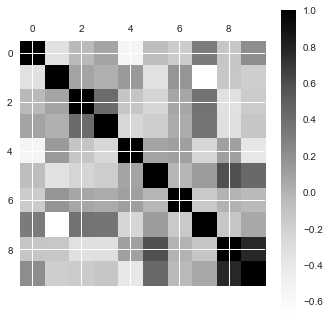

In [48]:
plt.matshow(df_train.corr())
plt.colorbar()
plt.show()

The above table shows the Pearson correlation coefficient between the different variables. We are mainly interested in how each of the different variables correlates with the variable 'Survived'. 
The 'Fare' (the fee paid) correlates strongly with 'Survived' (32%) as does the 'Pclass' (33.8%).
Furthermore we see that 'Age' and 'Pclass' as well ass 'Pclass'and 'Fare' are highly correlated, 34% and 68.6% respectively. This correlation can easily be explained by the fact that slightly older people are likely to be richer and are thus able to afford a higher fare. In turn this means that they would be in a better class. 
Lastly, gender correlates highly with 'Survived' (54.3%) and 'Children' correlates highly with 'Children2'. The latter makes a lot of sense as 'Children2' is 'Children' divided by gender.

The correlation plot shows us the same thing. Here, the darker the grey, the stronger two variables are correlated.  

### Models

Before we start the modelling exercise, we first create an X and y numpy array for the training data and a X numpy array for the test data. 

In [49]:
y_train = df_train['Survived'].ravel()
df_train = df_train.drop(['Survived'], axis=1)
X_train = df_train.values 
X_test = df_test.values

SCORING THE MODELS

The 'score' method is used to judge the quality of fit of the model. The closer the score is to 1, the better the fit of the model. Next to the score method we also use the cross validation algorithm to test the accuracy of our model. The cross validation algorithm, by default, splits the data into three samples and tests how well the model fits to each of these samples. We compute the mean and standard deviation of the three scores obtained by the cross validation method to compare the models as well. We could specify the number of samples the data is split in by specifying the cv parameter which is set to 3 in the loogistic regression example.


LOGISTIC REGRESSION

The Titanic problem is a binary problem also known as a classification problem; we are trying to learn a model to predict whether a passenger died or survived. In a logistic regression we assess the probability that y=1 dependent on the features x. In this sense, logistic regression is a linear model and not necessarily a regression. Logistic regression takes the following form:

Theta (x) = g(theta ^ T * x) or g(z) = 1 / (1 + e ^ (-z)) where e is the natural base of the logarithm. Similarly as for linear models, we can find the cost function for the above model description and optimize this. 

The form of this function means that the outcome can only be 0 or 1, hence this form of regression is only suitable for binary problems.

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = logreg.score(X_train, y_train)
acc_log2 = cross_val_score(logreg, X_train, y_train, cv=3)
m_acc_log2 = acc_log2.mean()
sd_acc_log2 = acc_log2.std()
acc_log

0.81369248035914699

SUPPORT VECTOR MACHINES (SVC) ALGORITHM

The below uses the Support Vector Machines algorithm. The algorithm includes regression, classification and outlier detection methods. For the Titanic problem we use the SVC specification to perform multi-class classification on the data. 

The algorithm will class each data point from the learning set into a category and in this way learn a model. New datapoints will then fall in either category that has been developed based on the training set. Using this algorithm it is possible to draw a clear decision boundary. Different kernels can be used to fit a model. The options are linear, polynomial and RBF. The linear kernel fits a linear model to the data; the polynomial kernel fits a polynomial model, the RBF fits a radial basis function. 

In this problem we apply the algorithm with only 2 classes, but this can be adjusted to encompass multiple classes. 

C is the regularization parameter. It is set to 1 by default, however if the data has a lot of noise, the parameter should be decreased. We expect the data to have little noise as it is unlikely that passengers died of different causes than the sinking of the Titanic. We find that by increasing the regularization parameter, the fit of the model increases as measured by the .score . 

Gamma, defined in the RBF function is a parameter measuring how far the influence of one training example reaches. A low value for gamma means that the training example reaches far; a high value for gamma means the training example reached close. The parameter cannot be set to a negative value. Setting gamma too large will lead to overfitting. 


In [51]:
# The Linear Kernel

C=2 #Regularization parameter

clf_linear = svm.SVC(kernel='linear', C=C)
clf_linear.fit(X_train, y_train)
Y_pred = clf_linear.predict(X_test)
acc_clf_linear = clf_linear.score(X_train, y_train)
acc_clf_linear2 = cross_val_score(clf_linear,X_train, y_train)
m_acc_clf_linear2 = acc_clf_linear2.mean()
sd_acc_clf_linear2 = acc_clf_linear2.std()


In [52]:
# The RBF Kernel

C=2 #Regularization parameter

clf_rbf = svm.SVC(kernel='rbf', gamma=0.3, C=C)
clf_rbf.fit(X_train, y_train)
Y_pred = clf_rbf.predict(X_test)
acc_clf_rbf = clf_rbf.score(X_train, y_train)
acc_clf_rbf2 = cross_val_score(clf_rbf,X_train, y_train)
m_acc_clf_rbf2 = acc_clf_rbf2.mean()
sd_acc_clf_rbf2 = acc_clf_rbf2.std()


NEAREST NEIGHBOUR CLASSIFIER

The Nearest Neighbour Classifier (KNN) will, for each new observation in the training data X, find the observation that is closest. In this sense the KNN is a distance based classifier. The KNN has low bias, but also high variance which increases the risk of overfitting.

In [53]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, y_train)
acc_knn2 = cross_val_score(knn,X_train, y_train)
m_acc_knn2 = acc_knn2.mean()
sd_acc_knn2 = acc_knn2.std()

# h = 0.2

#x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
#y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                         np.arange(y_min, y_max, h))
#Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

 #Put the result into a color plot
#Z = Z.reshape(xx.shape)
#plt.figure()
#plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
#plt.scatter(X_train[:, 0], X[:, 1], c=y_train, cmap=cmap_bold)
#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.title("3-Class classification (k = %i, weights = '%s')"

#% (n_neighbors, weights))

#plt.show()

DECISION TREES

A decision tree is a classifier which maps observations based on characteristics. The learnt model can be represented as a tree where the observations or features about an training example are on the branches and the leaves are the class labels. Based on the model that is learnt in this manner, outcome for new data can be predicted. In the titanic problem, the different features are on the branches and the leaves represent the two classes.

In [54]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
Y_pred = DT.predict(X_test)
acc_DT = DT.score(X_train, y_train)
acc_DT2 = cross_val_score(DT, X_train, y_train)
m_acc_DT2 = acc_DT2.mean()
sd_acc_DT2 = acc_DT2.std()

RANDOM FOREST

A random forest is a method where random samples are taken from the training data with replacement. As samples are drawn uniformly and with replacement, the different models defined in this way will be based on diverse samples where some training data might be used more than once, and some not at all. This method is also know as 'bagging' which is short for 'bootstrap sampling'. When bagging is combined with randomly selecting features to be used for a decision tree classifier, we start building a random forest. Randomly selecting features is also known as subspace sampling. The combination of subspace sampling and bagging induces great variety in the ensemble. The different trees created in this way together make up a random forest. 

Because of the manner in which the random forest algorithm works, the chance that it overfits the data is relatively slim. 

In [55]:
RFC = ensemble.RandomForestClassifier()
RFC.fit(X_train, y_train)
Y_pred = RFC.predict(X_test)
acc_RFC = RFC.score(X_train, y_train)
acc_RFC2 = cross_val_score(RFC, X_train, y_train)
m_acc_RFC2 = acc_RFC2.mean()
sd_acc_RFC2 = acc_RFC2.std()

EXTREME RANDOMIZED TREES

Extreme Randomized Trees are similar to random forests in the way they are build. They make use of bagging and of subspace sampling. Where they differ is that, from the random selection of features included in each tree now the threshold in each feature is picked randomly (in the random forest this was done on best pick basis). In this way the variance is reduced a bit more but the bias increases a little bit. 

In [56]:
ETC = ensemble.ExtraTreesClassifier()
ETC.fit(X_train, y_train)
Y_pred = ETC.predict(X_test)
acc_ETC = ETC.score(X_train, y_train)
acc_ETC2 = cross_val_score(RFC, X_train, y_train)
m_acc_ETC2 = acc_ETC2.mean()
sd_acc_ETC2 = acc_ETC2.std()

In [57]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Linear SVC', 'SVC RBF', 'KNN','Decision Tree','Random Forest','Extreme Randomized Tree'],
    'Score' : [acc_log, acc_clf_linear, acc_clf_rbf, acc_knn, acc_DT, acc_RFC, acc_ETC],
    'CVS_Mean' : [m_acc_log2, m_acc_clf_linear2, m_acc_clf_rbf2, m_acc_knn2, m_acc_DT2, m_acc_RFC2, m_acc_ETC2],
    'CVS_SD' : [sd_acc_log2, sd_acc_clf_linear2, sd_acc_clf_rbf2, sd_acc_knn2, sd_acc_DT2, sd_acc_RFC2, sd_acc_ETC2]
})
models.sort_values(by='Score', ascending=False)
models

,CVS_Mean,CVS_SD,Model,Score
0,0.796857,0.004199,Logistic Regression,0.813692
1,0.802469,0.015141,Linear SVC,0.814815
2,0.783389,0.025396,SVC RBF,0.928171
3,0.781145,0.033445,KNN,0.851852
4,0.795735,0.022221,Decision Tree,0.959596
5,0.800224,0.015872,Random Forest,0.950617
6,0.797980,0.019244,Extreme Randomized Tree,0.959596


From the above table we find that, based on the score algorithm, the Decision Tree and the Extreme Randomized Trees fit the training data equally well, in both cases almost 96% of the training examples are classified correctly. When looking at the average cross validation score for these two models, we see that the Extreme Randomized Tree performance best and on average classifies 80% of the data correctly. 


### Further ideas + things that need solving still

- Using a confusion matrix to show how well the models fit the test data. In a confusion matrix, the values on the diagonal show the number of observations classified right, we want this to be as high as possible. 
- Work out a feature around the titles in the name variable using the str.extract as given below:
        df_train['Title'] = df_train['Name'].str.extract('( [A-Za-z]+)\.', expand=False)
- Plot ticks on axes of correlation plot
- Work a way around the 'ValueError: query data dimension must match training data dimension' when tryin to plot the decision boundary plot for the KNN classifier.  
- Add SVC with polynomial kernel


### References

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

Various other notebooks created to solve the Titanic problem and other online sources. 

